In [1]:
from threading import Lock
import warnings
import matplotlib.pyplot as plt
import pyximport
from tqdm import tnrange, tqdm_notebook

warnings.filterwarnings('ignore')

import sys
import os

sys.path.insert(0, os.path.join(os.getcwd(), os.pardir))
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

pyximport.install(setup_args={"include_dirs": np.get_include()})
import XXZZham as XXZZham
from XXZZham import add_high_energies, rotate_to_00_base
import random
import adiabatic_sim as asim
import time

import multiprocessing
import ctypes
mkl_rt = ctypes.CDLL('libmkl_rt.so')
mkl_get_max_threads = mkl_rt.mkl_get_max_threads
mkl_rt.mkl_set_num_threads(ctypes.byref(ctypes.c_int(multiprocessing.cpu_count())))
import os
import LH_tools as LHT

%precision %.15f
PRECISION  = 2 ** -40

from IPython.display import display
import FD_tools as FDT

In [2]:
def _simulate_time_p_and_pfab_repeat(repeats: int, T: float, steps: int, psi0: Qobj, psi1: Qobj, H0: Qobj, H1: Qobj):

    """
        Callback for simulation of fowrard and backword propagation
    :param T:
    :param steps:
    :param psi0:
    :param psi1:
    :param H0:
    :param H1:
    :return:
    """
    tlist = np.linspace(0, T, steps)
    backprop_t, prop_t = FDT.create_back_and_forward_props(tlist, H0, H1)
    psi_forward = prop_t * psi0
    
    psi_repeat = (backprop_t*prop_t)**repeats * psi0
    
    Pf0 = abs(psi1.overlap(psi_forward)) ** 2
    Prepeat = abs(psi0.overlap(psi_repeat)) ** 2
    return T, Pf0, Prepeat

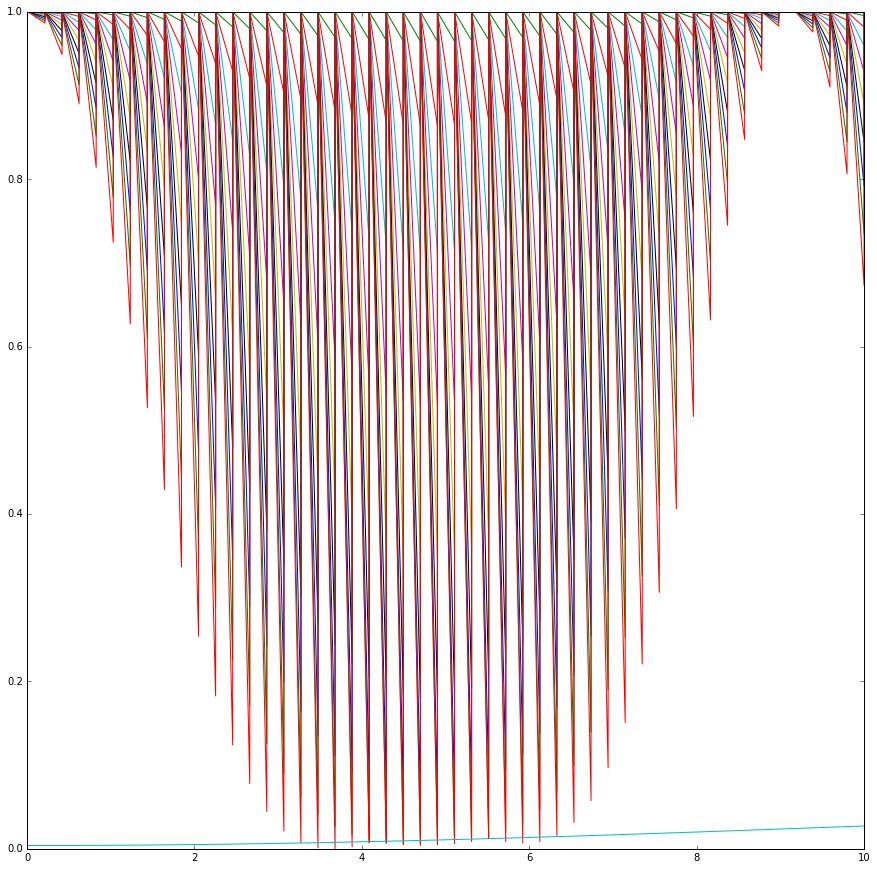

In [9]:
from concurrent.futures import ThreadPoolExecutor,as_completed

H0n,H1n,psi0n = FDT.prepare_groverlike_system(8)
executor = ThreadPoolExecutor(48)
tasks = []
plt.figure(figsize=(15,15))
for repeats in range(10):
    final_times = np.linspace(0.01, 10, 50)
    for T in final_times: 
        tasks.append(
            executor.submit(
                _simulate_time_p_and_pfab_repeat,repeats, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
        )
    results = [simulation.result() for simulation in as_completed(tasks)]
    results.sort()
    A = np.array(results)
    plt.plot(A[0:,0],A[0:,2])

    
plt.plot(A[0:,0],A[0:,1])
plt.show()

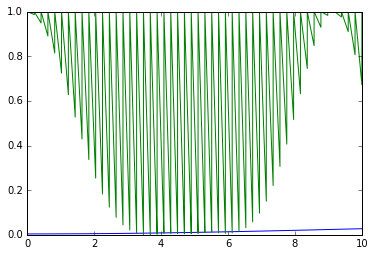

In [10]:
plt.plot(A[0:,0],A[0:,1])
plt.plot(A[0:,0],A[0:,2])

plt.show()

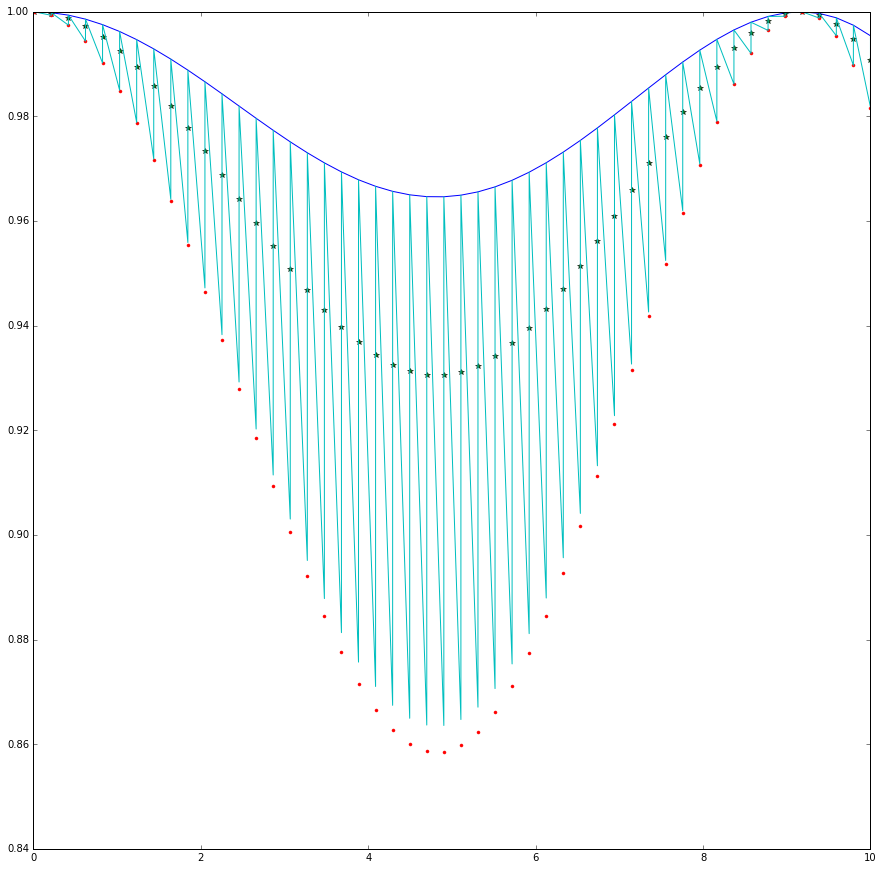

In [19]:
from concurrent.futures import ThreadPoolExecutor,as_completed

H0n,H1n,psi0n = FDT.prepare_groverlike_system(8)
executor = ThreadPoolExecutor(48)
tasks = []
plt.figure(figsize=(15,15))

final_times = np.linspace(0.01, 10, 50)
for T in final_times: 
    tasks.append(
        executor.submit(
            _simulate_time_p_and_pfab_repeat,1, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
    )
results = [simulation.result() for simulation in as_completed(tasks)]
results.sort()
A = np.array(results)
plt.plot(A[0:,0],A[0:,2])
plt.plot(A[0:,0],A[0:,2]**2,'*')
plt.plot(A[0:,0],1-(1-A[0:,2])*4,'.')

for T in final_times: 
    tasks.append(
        executor.submit(
            _simulate_time_p_and_pfab_repeat,2, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
    )
results = [simulation.result() for simulation in as_completed(tasks)]
results.sort()
Ar = np.array(results)
plt.plot(Ar[0:,0],Ar[0:,2])
    
plt.show()

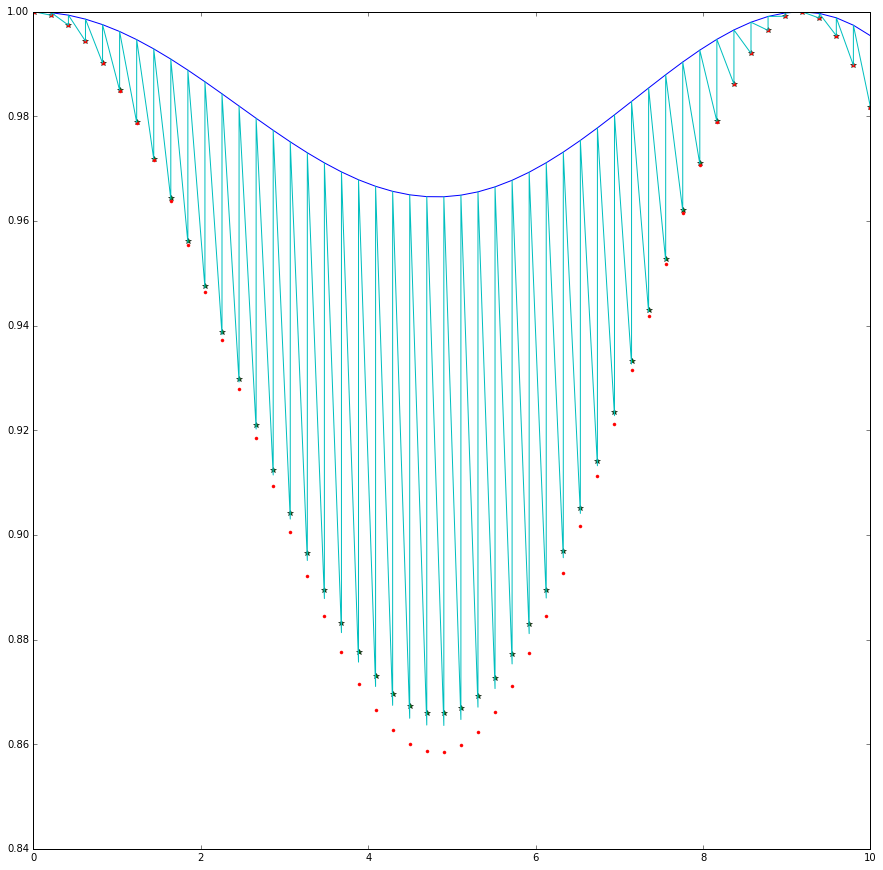

In [25]:
plt.figure(figsize=(15,15))

plt.plot(A[0:,0],A[0:,2])
plt.plot(A[0:,0],A[0:,2]**4,'*')
plt.plot(A[0:,0],1-(1-A[0:,2])*4,'.')
plt.plot(Ar[0:,0],Ar[0:,2])
plt.show()

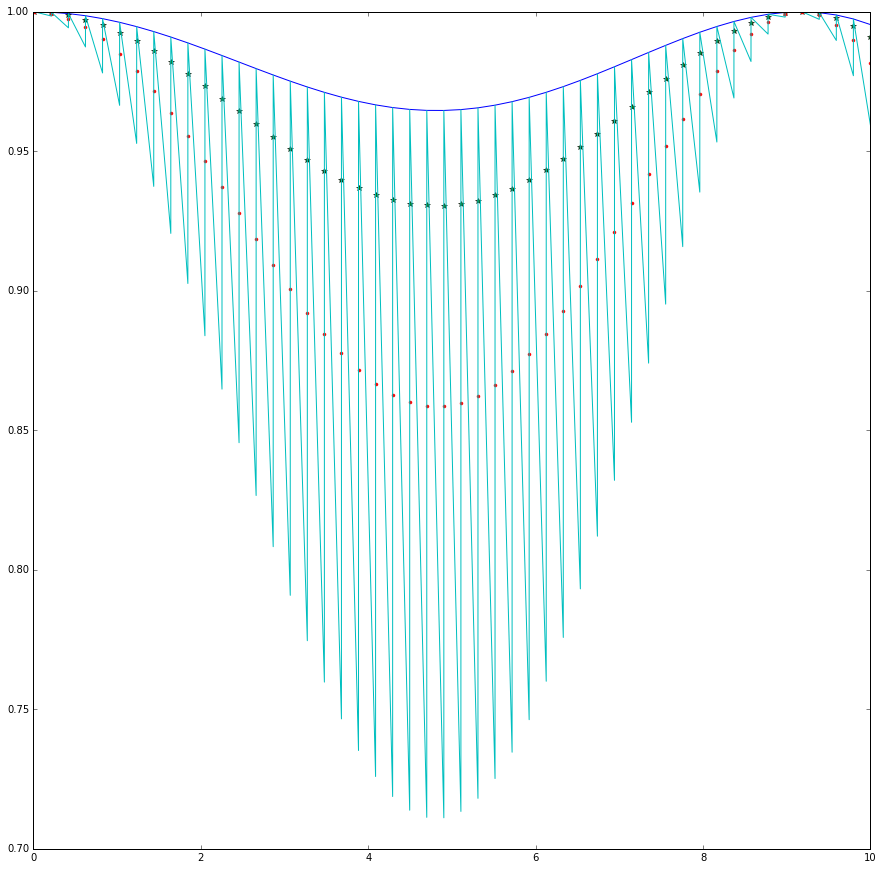

In [26]:
from concurrent.futures import ThreadPoolExecutor,as_completed

H0n,H1n,psi0n = FDT.prepare_groverlike_system(8)
executor = ThreadPoolExecutor(48)
tasks = []
plt.figure(figsize=(15,15))

final_times = np.linspace(0.01, 10, 50)
for T in final_times: 
    tasks.append(
        executor.submit(
            _simulate_time_p_and_pfab_repeat,1, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
    )
results = [simulation.result() for simulation in as_completed(tasks)]
results.sort()
A = np.array(results)
plt.plot(A[0:,0],A[0:,2])
plt.plot(A[0:,0],A[0:,2]**2,'*')
plt.plot(A[0:,0],1-(1-A[0:,2])*4,'.')

for T in final_times: 
    tasks.append(
        executor.submit(
            _simulate_time_p_and_pfab_repeat,3, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
    )
results = [simulation.result() for simulation in as_completed(tasks)]
results.sort()
Ar = np.array(results)
plt.plot(Ar[0:,0],Ar[0:,2])
    
plt.show()

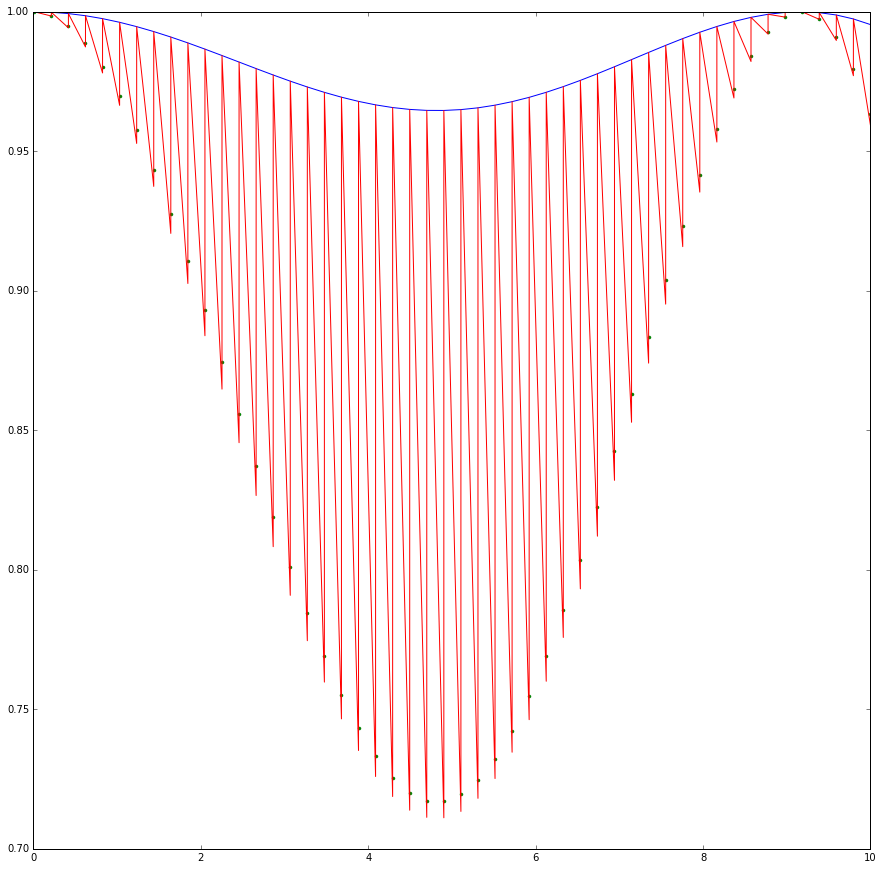

In [34]:
plt.figure(figsize=(15,15))

plt.plot(A[0:,0],A[0:,2])
plt.plot(A[0:,0],1-(1-A[0:,2])*8,'.')
plt.plot(Ar[0:,0],Ar[0:,2])
plt.show()

In [35]:
# that seems like exponential :O

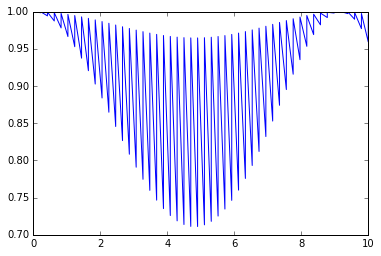

In [37]:
plt.plot(Ar[0:,0],Ar[0:,2])
    
plt.show()

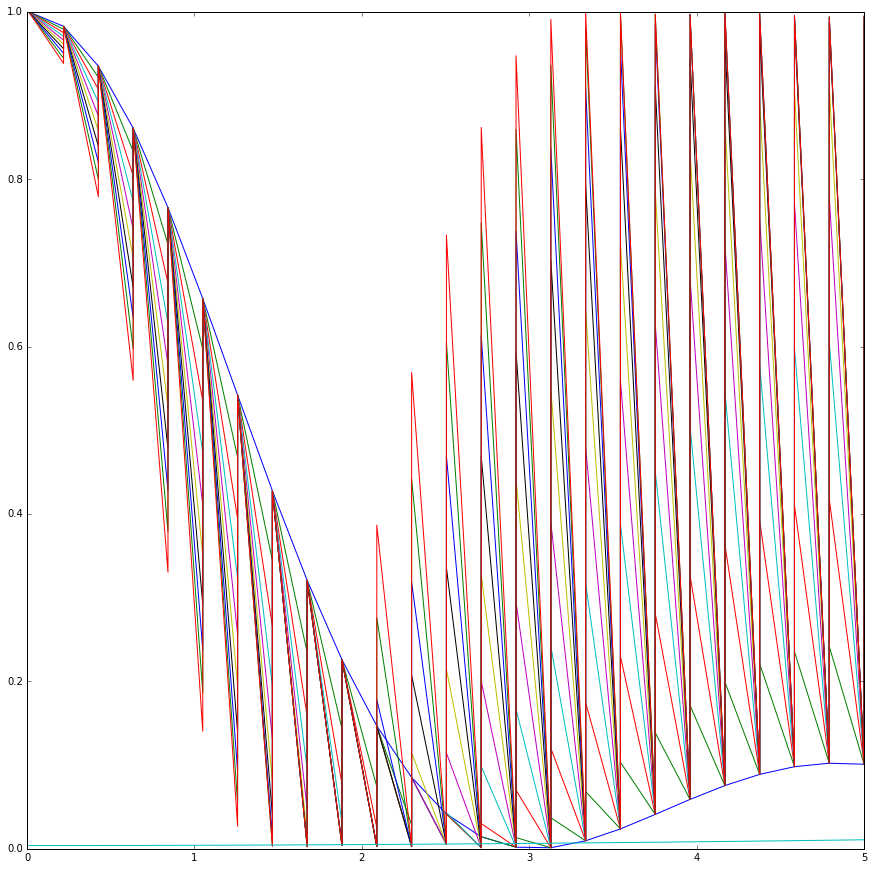

In [39]:
from concurrent.futures import ThreadPoolExecutor,as_completed

H0n,H1n,psi0n = FDT.prepare_groverlike_system(8)
executor = ThreadPoolExecutor(48)
tasks = []
plt.figure(figsize=(15,15))
for repeats in range(10,20):
    final_times = np.linspace(0.01, 5, 25)
    for T in final_times: 
        tasks.append(
            executor.submit(
                _simulate_time_p_and_pfab_repeat,repeats, T, max(T*5,50) , psi0n, basis(2,0) , H0n, H1n)
        )
    results = [simulation.result() for simulation in as_completed(tasks)]
    results.sort()
    A = np.array(results)
    plt.plot(A[0:,0],A[0:,2])

    
plt.plot(A[0:,0],A[0:,1])
plt.show()